In [9]:
from astropy import units as u

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
import pandas as pd

In [11]:
def m(size):
    # generate float number between 1 and 3 with size len(m)
    return np.random.uniform(1,3,size) * u.M_sun

In [12]:
# Generating dataset
size = 10000

m1_lst = []
m2_lst = []

while len(m1_lst) < size:
    m1 = m(1)
    m2 = m(1)
    # if m1 > m2:
    m1_lst.append(m1)
    m2_lst.append(m2)
        
m1 = np.array(m1_lst) * u.M_sun
m2 = np.array(m2_lst) * u.M_sun

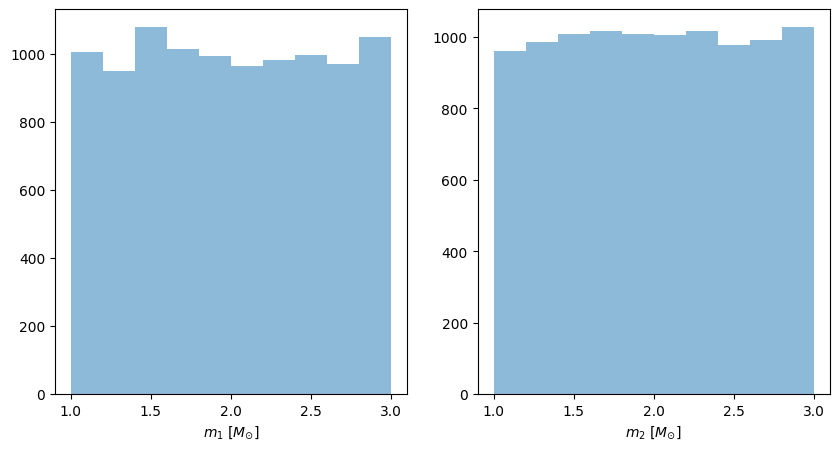

In [13]:
# two plots side by side
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(m1, bins=10, alpha=0.5, label='m1')
plt.xlabel(r'$m_1$ $[M_{\odot}]$')
plt.subplot(1,2,2)
plt.hist(m2, bins=10, alpha=0.5, label='m1')
plt.xlabel(r'$m_2$ $[M_{\odot}]$')
plt.savefig('histogram_BNS.png')

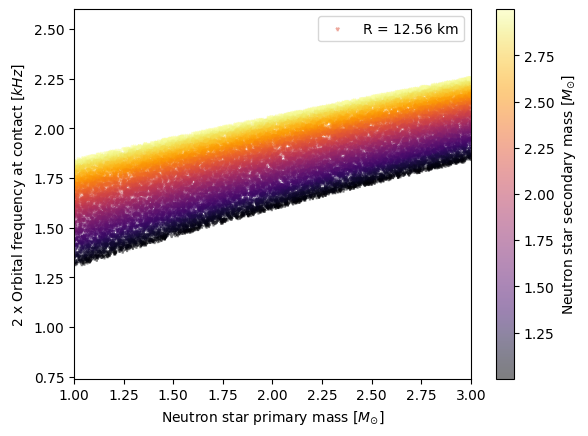

In [36]:
from astropy.constants import G

for a_val in [12.56]: # median from arXiv:2106.05313 PSR+GW+NICER
    a = a_val * u.km
    num = (4*np.pi**2) * (2.*a)**3
    dem = G*(m1+m2)
    P = np.sqrt(num/dem)
    f_kepler = (1/P).to(u.Hz) # this is an orbital frequency (GW frequency would be double)
    m_avg = (m1+m2)/2
    
    lower = np.percentile(f_kepler, 5)
    upper = np.percentile(f_kepler, 95)
    median = np.percentile(f_kepler, 50)
    mean = np.mean(f_kepler)
    
    plt.scatter(m1, 2.*f_kepler.to(u.kHz), alpha=0.5, s=10, marker = "1", label = f"R = {a}", c = m2.value, cmap = 'inferno')
    plt.scatter(m2, 2.*f_kepler.to(u.kHz), alpha=0.5, s=10, marker = "1", c = m1.value, cmap = 'inferno')
    plt.colorbar(label = r'Neutron star secondary mass $[M_{\odot}]$')
    # strongest resonance occurs when f-mode frequency is twice orbital frequency, cf. arXiv:astro-ph/9812116
    # so check if f-mode frequency is ever below twice orbital frequency at contact (which happens to be equal to the GW contact frequency)
plt.ylim(0.74, 2.6)
plt.xlim(1, 3)
plt.xlabel(r'Neutron star primary mass $[M_{\odot}]$')
plt.ylabel(r'2 x Orbital frequency at contact $[kHz]$')
plt.legend()
plt.savefig('contact_BNS.png')

In [26]:
df = pd.DataFrame({"m1": m1.value.squeeze(), "m2": m2.value.squeeze()})
df['f_kepler'] = f_kepler.value.squeeze()
df['f_contact'] = (2.*f_kepler).value.squeeze()
df.to_csv('contact_BNS.csv')

In [27]:
df

,m1,m2,f_kepler,f_contact
0,2.375905,2.198521,984.951359,1969.902718
1,1.867470,1.090858,792.081068,1584.162136
2,1.088250,1.736503,773.992473,1547.984946
3,2.674858,1.331767,921.798151,1843.596302
4,2.773365,2.615714,1069.064177,2138.128354
...,...,...,...,...
9995,2.446648,2.559353,1030.367048,2060.734097
9996,2.151272,2.304274,972.068689,1944.137379
9997,1.716756,2.335188,926.996762,1853.993524
9998,1.517409,2.820927,959.197666,1918.395332
